In [1]:
import os

In [2]:
os.chdir("..")

In [8]:
from utils.config import process_config
from utils.dirs import create_dirs
from utils.utils import get_args
from rich.console import Console
from pathlib import  Path
import json
from dotmap import DotMap
from data_loader.conv_atac_data_loader import  ConvATACseqDataLoader
from models.conv_atac_model import ConvATACseqModel
import tensorflow as tf

In [9]:
from utils.pwm import DEFAULT_BASE_BACKGROUND, pssm_array2pwm_array, _pwm2pwm_info
from utils.plot import seqlogo, seqlogo_fig

In [10]:
from tensorflow.keras.models import Model
import numpy as np
import pandas as pd
import pickle
from tqdm import tqdm

In [11]:
json_file="configs/conv_chip_from_config.json"
with open(json_file, 'r') as config_file:
        config_dict = json.load(config_file)

# convert the dictionary to a namespace using bunch lib
config = DotMap(config_dict)
config

DotMap(exp=DotMap(name='conv_atac_from_config'), data_loader=DotMap(name='ConvATACseqDataLoader'), model=DotMap(name='ConvATACseqModel', learning_rate=0.001, optimizer='adam', seq_len=500, nb_filters=200, nb_hidden=100, kern_size=19, dropout_rate=0.2, pooling_size=4, loss='binary_crossentropy', outname='ConvATACseq', use_pwminit=True), trainer=DotMap(name='ConvATACseqModelTrainer', num_epochs=50, batch_size=64, validation_split=0.25, verbose_training=True, train_chroms=['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7'], test_chroms=['chr9', 'chr10', 'chr11']), callbacks=DotMap(checkpoint_monitor='val_loss', checkpoint_mode='min', checkpoint_save_best_only=True, checkpoint_save_weights_only=True, checkpoint_verbose=True, tensorboard_write_graph=True), data=DotMap(path='/home/mdjekide/tmp/ChipseqDNA_DL/data/example_ATACseq_data.tsv', pwm='/home/mdjekide/tmp/ChipseqDNA_DL/data/JASPAR2018_CORE_vertebrates_non-redundant.meme'), comet_api_key='Ctb3QHF7cNvJbKCOpxMaN9ngw', _ipython_displ

In [12]:
data_loader = ConvATACseqDataLoader(config)

In [13]:
data = data_loader.get_train_data()

Loading training data ...

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 177331/177331 [00:11<00:00, 15261.39it/s]


Loaded 177331 sequences.

Hot-encoding.

In [7]:
model = tf.keras.models.load_model("experiments/2021-08-22/conv_atac_from_config/models/ConvATACseqModel")

2021-08-22 12:37:22.503294: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-08-22 12:37:22.514080: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:81:00.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2021-08-22 12:37:22.514432: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /hpcf/authorized_apps/rhel7_apps/R/install/4.0.2/lib64/R/lib:/hpcf/authorized_apps/rhel7_apps/geos/install/3.8.1/lib:/hpcf/authorized_apps/rhel7_apps/gdal/install/3.1.2/lib:/hpcf/authorized_apps/rhel7_apps/proj/install/v6/lib:/hpcf/authorized_apps/rhel7_apps/gcc/install/8.3.0/lib64:/hpcf/lsf/lsf_prod/10.1/linux3.10-glibc2

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [ ]:
model.summary()

In [ ]:
kernels = model.get_layer("conv1d").get_weights()

In [ ]:
kernels[0].shape

In [6]:
kernels[0][:,:,0]

NameError: name 'kernels' is not defined

In [37]:
kernels[1].shape

(200,)

In [43]:
[{i : kernels[0][:,:,i].max() } for i in range(200)]

[{0: 5.120253e-34},
 {1: 5.8079454e-34},
 {2: 5.632032e-34},
 {3: 5.140716e-34},
 {4: 5.6668103e-34},
 {5: 3.5687627e-34},
 {6: 5.6493216e-34},
 {7: 5.7916685e-34},
 {8: 5.758631e-34},
 {9: 5.0837187e-34},
 {10: 5.657499e-34},
 {11: 5.8121386e-34},
 {12: 4.739731e-34},
 {13: 3.799786e-34},
 {14: 5.8365443e-34},
 {15: 5.7287837e-34},
 {16: 5.7716263e-34},
 {17: 5.3630823e-34},
 {18: 5.33341e-34},
 {19: 5.535445e-34},
 {20: 5.6459705e-34},
 {21: 5.8587883e-34},
 {22: 4.0940834e-34},
 {23: 5.7538304e-34},
 {24: 5.489712e-34},
 {25: 5.267129e-34},
 {26: 5.197801e-34},
 {27: 5.0562374e-34},
 {28: 5.426819e-34},
 {29: 4.1611453e-34},
 {30: 5.061303e-34},
 {31: 5.46127e-34},
 {32: 5.2409085e-34},
 {33: 4.8441525e-34},
 {34: 7.049168e-35},
 {35: 5.8380105e-34},
 {36: 5.6806e-34},
 {37: 3.1423476e-34},
 {38: 5.783648e-34},
 {39: 5.296644e-34},
 {40: 4.043674e-34},
 {41: 5.2222305e-34},
 {42: 5.729625e-34},
 {43: 3.1179118e-34},
 {44: 4.2075585e-34},
 {45: 5.7095565e-34},
 {46: 5.057631e-34},
 {

In [52]:
DEFAULT_BASE_BACKGROUND

{'A': 0.25, 'C': 0.25, 'G': 0.25, 'T': 0.25}

In [29]:
quasi_pwm = pssm_array2pwm_array(kernels[0], DEFAULT_BASE_BACKGROUND)
kern = _pwm2pwm_info(quasi_pwm)
kern.shape

(19, 4, 200)

In [53]:
kern[:,:,193]

array([[5.91337681e-04, 6.25558023e-04, 6.13553741e-04, 6.92138157e-04],
       [2.38609966e-04, 2.55900261e-04, 2.37146247e-04, 2.56350177e-04],
       [4.47758590e-04, 5.06968354e-04, 4.53300163e-04, 4.55452537e-04],
       [4.22585930e-04, 4.50905238e-04, 4.35992901e-04, 4.82827571e-04],
       [5.59994020e-04, 6.39489503e-04, 5.79870131e-04, 6.37137855e-04],
       [8.82004097e-04, 1.08519860e-03, 9.82874539e-04, 9.65947867e-04],
       [3.22482083e-04, 3.27147223e-04, 3.04534886e-04, 2.95268372e-04],
       [8.72834178e-04, 7.69759121e-04, 8.22382979e-04, 7.31978507e-04],
       [2.26168148e-03, 2.06569931e-03, 2.17840029e-03, 2.76357541e-03],
       [4.35819209e-04, 4.08318767e-04, 4.23859921e-04, 4.66497208e-04],
       [3.53525323e-03, 3.42510757e-03, 4.74652136e-03, 3.40873678e-03],
       [3.28336551e-04, 3.01152118e-04, 3.24077642e-04, 2.99442443e-04],
       [1.59443560e-04, 1.56781534e-04, 1.61518954e-04, 1.69800827e-04],
       [2.65501352e-04, 2.75145750e-04, 2.95939826e

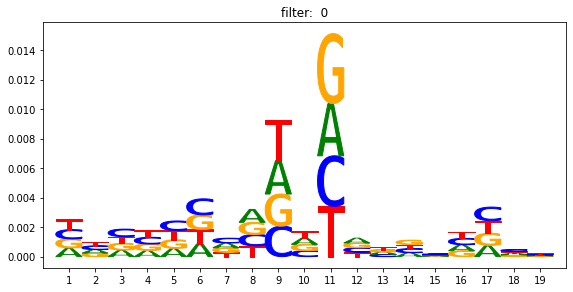

In [51]:
fig = seqlogo_fig(kern[:,:,193], vocab="DNA", figsize=(8,4), ncol=2, plot_name="filter: ")

In [54]:
X_train.shape

(177331, 500, 4)

# Get notmalized motifs

In [71]:
def GetMotifActivatedRegions( model, config,outDir, batch_size = 400):    
    # Get a function to calculate the output of the convolution layer
    conv_layer_model = Model(model.layers[0].input, model.get_layer("conv1d").output)
    
    # Get the number of filters
    nbfilters = int(model.get_layer("conv1d").kernel.shape[2])
    W  = model.get_layer("conv1d").get_weights()
    kernel_size = model.get_layer("conv1d").kernel.shape[:2].as_list()
    # Initialize the list of filters
    kernel_motifs = {} #Dict.empty(key_type = types.float32, value_type= float_matrix)    
    nbActive_per_kernel = {} #Dict.empty(key_type= types.float32, value_type=types.float32)
    for i in range(nbfilters):
        kernel_motifs[i] = np.zeros(kernel_size) 
        nbActive_per_kernel[i] = 0

    kernel_size = kernel_size[0]
    
    data_loader = ConvATACseqDataLoader(config)
    X_train, Y_train = data_loader.get_train_data()
        
        
    dataset  = tf.data.Dataset.from_tensor_slices(X_train)
    dataset = dataset.batch(batch_size)
    
    print("We have :" + str(X_train.shape[0]/batch_size) + " batches")
    import pdb; pdb.set_trace()
    # Process by batch        
    for step, x_batch in enumerate(dataset):            
          print(step)	
          out = conv_layer_model(x_batch).numpy()
          s = step * batch_size
          e = min( (step+1) * batch_size, X_train.shape[0])
          # for each filter get max activation score

          print("calculating the motifs of the activated regions")
          #kernel_motifs, nbActive_per_kernel = calcMotifActivation(nbfilters,W,out, input['sequences'][s:e],kernel_motifs,nbActive_per_kernel,kernel_size)
          for fltr in tqdm(range(nbfilters)):
            threshold = 0 # (sum(np.amax(W[0][:,:,fltr], axis=1))+ W[1][fltr]) * 0.8
            #logfile.write("-----------------")
            #logfile.write("Step:%d filter:%d threshold:%s\n" % (step, fltr,str(threshold)))
            if(threshold <=0):                 
                 continue
            # for each window check the regions that are activated
            for seq_id in range(out.shape[0]):
                seq_num = s + seq_id
                #threshold = max(conv_output[seq_num,:,fltr]) * 0.9
                which_active = np.argwhere(out[seq_id,:,fltr] > threshold)
                #logfile.write("Step:%d filter:%d sequence:%d nbActive:%d\n" % (step, fltr, seq_id, len(which_active)))
                if len(which_active) >0:
                    # sum all the activate sequences
                    for pos in which_active:
                        pos = int(pos)
                        #if pos <= input['sequences'][seq_num].shape[0] - kernel_size:
                        hot_seq = X_train[seq_num][pos:(pos+kernel_size)]
                        kernel_motifs[fltr ] += hot_seq
                        nbActive_per_kernel[fltr] += 1


    #conv_output = conv_layer_model.predict(input['sequences'][:4000], batch_size = 200, verbose=1)
    #conv_output = np.concatenate(conv_output,0)

    # calculate the mean motifs
    print("Calculating means")
    kernel_motifs_mean = {}
    for fltr in range(len(kernel_motifs)):
        if nbActive_per_kernel[fltr] >0:
             kernel_motifs_mean[fltr] = kernel_motifs[fltr]/nbActive_per_kernel[fltr]

    # save results as picle 
    pkl_out = open(f'{outDir}/kernel_motifs_mean.pickle',"wb")
    pickle.dump(kernel_motifs_mean,file=pkl_out)

    pkl_out = open(f'{outDir}/kernel_motifs.pickle','wb')
    pickle.dump(kernel_motifs, pkl_out)
    pkl_out.close()

    pkl_out = open(f'{outDir}/nbActive_per_kernel.pickle','wb')
    pickle.dump(nbActive_per_kernel, pkl_out)
    pkl_out.close()

In [58]:
from pathlib import Path

In [59]:
Path("experiments/2021-08-22/conv_atac_from_config/motifs").mkdir()

In [ ]:
res= GetMotifActivatedRegions(model,config,batch_size=400,outDir="experiments/2021-08-22/conv_atac_from_config/motifs")

Loading training data ...

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 177331/177331 [00:12<00:00, 14240.14it/s]


Loaded 177331 sequences.

Hot-encoding.